In [1]:
import pandas as pd 

In [2]:
data=pd.read_csv('C:\\Users\\Ravinder singh\\Desktop\\student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.shape

(25, 2)

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

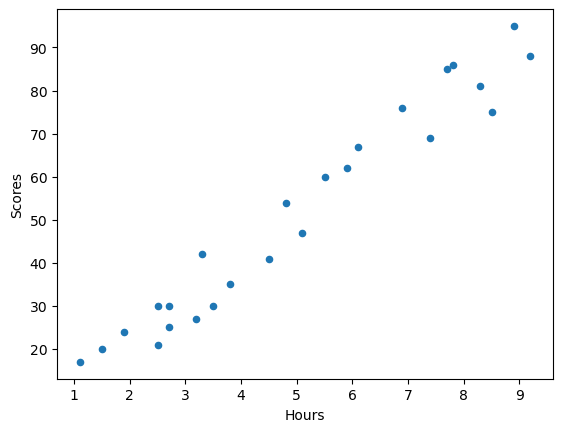

In [6]:
#visualise the data 
data.plot(x='Hours',y='Scores',kind='scatter')

In [7]:
#splitting dataset into dependent and independent var
X=data['Hours'].values.reshape((-1,1))
Y=data['Scores'].values



In [8]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(X, Y)

In [9]:
predicted_value=model.predict(X)
predicted_value

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527,
       17.14737849, 92.4210646 , 56.25059205, 83.62284155, 28.87834256,
       77.75735951, 60.16091341, 46.47478866, 34.74382459, 13.23705714,
       89.48832358, 26.92318188, 21.05769985, 62.11607409, 74.8246185 ,
       28.87834256, 49.40752968, 39.63172629, 69.9367168 , 78.73493985])

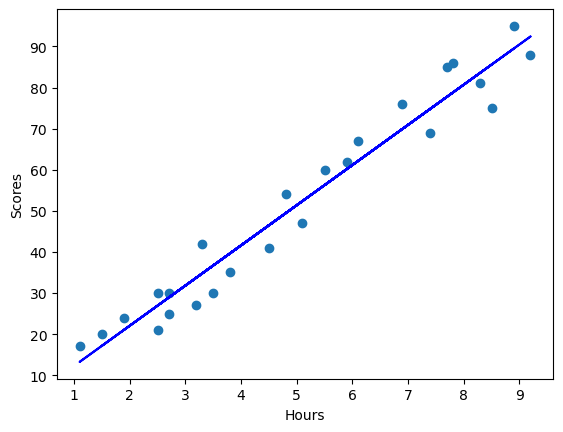

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.plot(X,predicted_value,color="blue")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [11]:
from sklearn.metrics import r2_score
score=r2_score(Y,predicted_value)
score

0.9529481969048356

In [12]:
#now splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=15)

In [13]:
#training data , train our model using training dataset
R1=LinearRegression()
R1.fit(x_train,y_train)

LinearRegression()

In [14]:
pred_train=R1.predict(x_train)

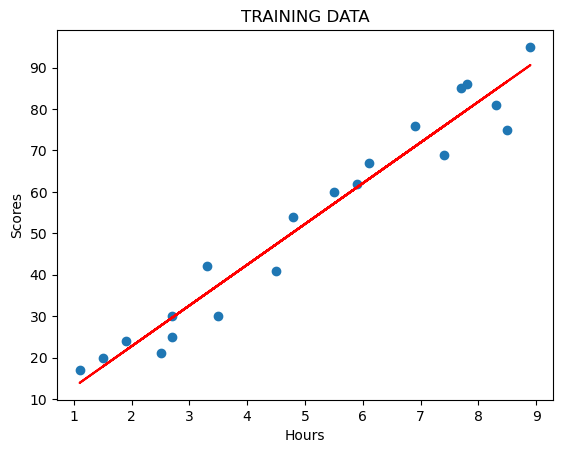

In [15]:
plt.scatter(x_train,y_train)
plt.plot(x_train,pred_train,color="red")
plt.title('TRAINING DATA')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [16]:
#computing R square for training data 
#it tells us the accuracy of our model 
score1=r2_score(y_train,pred_train)
score1

0.953981575634516

In [17]:
# testing data 
pred_test=R1.predict(x_test)
pred_test

array([27.66781944, 40.45688147, 34.55423746, 53.2459435 , 93.58067759])

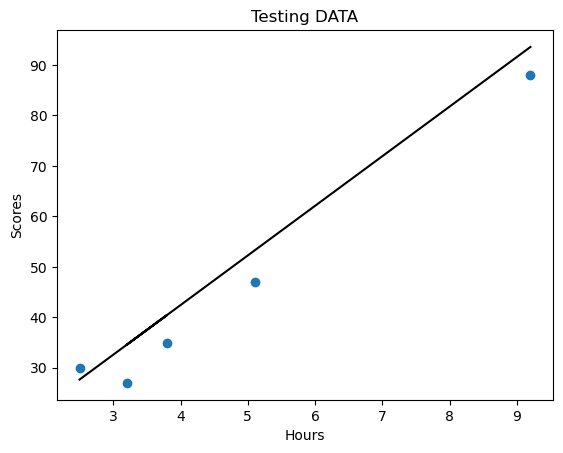

In [18]:
plt.scatter(x_test,y_test)
plt.plot(x_test,pred_test,color="black")
plt.title('Testing DATA')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [19]:
#computing R square for testing data 
#it tells us the accuracy of our  model when applies to testing dataset
score2=r2_score(y_test,pred_test)
score2

0.9350556142184708

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


Text(0, 0.5, 'scores')

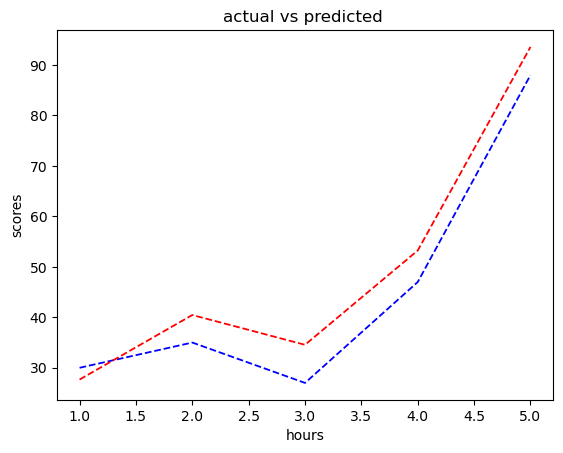

In [21]:
#here we find the differnce btw actual values and pred values , 
#first we create the index from 1 to 5 because we only 5 values in testing part 
#then we plot a graph between actual values and pred values 
index  = [i for i in range(1,6,1)]         # generating index 
plt.plot(index,y_test, color="blue", linewidth=1.3, linestyle="--")
plt.plot(index,pred_test, color="red",  linewidth=1.3, linestyle="--")
plt.title('actual vs predicted ')
plt.xlabel('hours')                              
plt.ylabel('scores') 

# pickling is just means serializing an object so that we can save it somewhere and so that we can also unpickle it and retrieve it when we need it .In general we save some data from a program we usually put it into a text file or json file 

In [22]:
import dill 
#from dill import dumps, loads

In [23]:
#here we dump the complete notebook into database
dill.dump_session('simple LR ids ( Inlude pickle ).db')

In [24]:
file="Linearfile1.pkl" #pickle file 
fileobj=open(file,'wb') # creating a object of a file 
# we opened the file in “wb” mode. 
#This means that you are writing the file in binary mode so that the data is returned in a bytes object.
dill.dump(R1,fileobj)# here dump takes two argument first is object and second is file object
fileobj.close()

In [25]:
#we unpickle the object using the load() function, 
#after which we can store the data in a different variable and use it as we see fit.
#load_file=pickle.load(open('Linearfile.pkl','rb'))
#load_file.predict(x_test)